In [56]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("truel.csv")

In [63]:
df

,p1_p2_dist,p1_p3_dist,p2_p3_dist,p1_acc,p2_acc,p3_acc,p1_target,p2_target,p3_target,p1_survive,p2_survive,p3_survive
0,0.349723,0.342730,0.07864,0.905871,0.511532,0.423182,2,1,1,0.254,0.165,0.661
1,0.349723,0.342730,0.07864,0.905871,0.511532,0.423182,2,1,2,0.429,0.064,0.611
2,0.349723,0.342730,0.07864,0.905871,0.511532,0.423182,2,3,1,0.530,0.177,0.272
3,0.349723,0.342730,0.07864,0.905871,0.511532,0.423182,2,3,2,0.822,0.079,0.186
4,0.349723,0.342730,0.07864,0.905871,0.511532,0.423182,3,1,1,0.266,0.674,0.144
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.130585,0.348468,0.26814,0.828293,0.779383,0.740670,2,3,2,0.759,0.026,0.184
7996,0.130585,0.348468,0.26814,0.828293,0.779383,0.740670,3,1,1,0.033,0.707,0.192
7997,0.130585,0.348468,0.26814,0.828293,0.779383,0.740670,3,1,2,0.181,0.262,0.272
7998,0.130585,0.348468,0.26814,0.828293,0.779383,0.740670,3,3,1,0.142,0.636,0.052


In [64]:
equilibria = df.sort_values(["p1_p2_dist", "p1_p3_dist", "p2_p3_dist", "p1_acc", "p2_acc", "p3_acc"])
equilibria = equilibria.groupby(["p1_p2_dist", "p1_p3_dist", "p2_p3_dist", "p1_acc", "p2_acc", "p3_acc"])

In [65]:
equilibria.head(8)

,p1_p2_dist,p1_p3_dist,p2_p3_dist,p1_acc,p2_acc,p3_acc,p1_target,p2_target,p3_target,p1_survive,p2_survive,p3_survive
1928,0.012514,0.179270,0.169906,0.880693,0.416723,0.047348,2,1,1,0.504,0.067,0.615
1929,0.012514,0.179270,0.169906,0.880693,0.416723,0.047348,2,1,2,0.527,0.062,0.595
1930,0.012514,0.179270,0.169906,0.880693,0.416723,0.047348,2,3,1,0.908,0.018,0.205
1931,0.012514,0.179270,0.169906,0.880693,0.416723,0.047348,2,3,2,0.964,0.004,0.160
1932,0.012514,0.179270,0.169906,0.880693,0.416723,0.047348,3,1,1,0.280,0.575,0.091
...,...,...,...,...,...,...,...,...,...,...,...,...
1947,0.849012,0.351131,0.535269,0.545388,0.156101,0.154544,2,3,2,0.922,0.275,0.412
1948,0.849012,0.351131,0.535269,0.545388,0.156101,0.154544,3,1,1,0.681,0.930,0.176
1949,0.849012,0.351131,0.535269,0.545388,0.156101,0.154544,3,1,2,0.926,0.746,0.097
1950,0.849012,0.351131,0.535269,0.545388,0.156101,0.154544,3,3,1,0.762,0.922,0.128


In [66]:
new = []
temp = dict()
for group in range(len(equilibria)):
    rows = equilibria.get_group((list(equilibria.groups)[group]))
    print(rows)
    for row in range(8):
        curr_row = rows.iloc[row]
        if curr_row["p1_survive"] > rows[(rows["p1_target"] != curr_row["p1_target"]) &
                                         (rows["p2_target"] == curr_row["p2_target"]) &
                                         (rows["p3_target"] == curr_row["p3_target"])]["p1_survive"].iloc[0]:
            if curr_row["p2_survive"] > rows[(rows["p1_target"] == curr_row["p1_target"]) &
                                         (rows["p2_target"] != curr_row["p2_target"]) &
                                         (rows["p3_target"] == curr_row["p3_target"])]["p2_survive"].iloc[0]:
                if curr_row["p3_survive"] > rows[(rows["p1_target"] == curr_row["p1_target"]) &
                                         (rows["p2_target"] == curr_row["p2_target"]) &
                                         (rows["p3_target"] != curr_row["p3_target"])]["p3_survive"].iloc[0]:
                    print(curr_row)
                    new.append(curr_row)
                    if curr_row["p1_p2_dist"] not in temp:
                        temp[curr_row["p1_p2_dist"]] = 1
                    else:
                        temp[curr_row["p1_p2_dist"]] += 1
            

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
1928    0.012514     0.17927    0.169906  0.880693  0.416723  0.047348   
1929    0.012514     0.17927    0.169906  0.880693  0.416723  0.047348   
1930    0.012514     0.17927    0.169906  0.880693  0.416723  0.047348   
1931    0.012514     0.17927    0.169906  0.880693  0.416723  0.047348   
1932    0.012514     0.17927    0.169906  0.880693  0.416723  0.047348   
1933    0.012514     0.17927    0.169906  0.880693  0.416723  0.047348   
1934    0.012514     0.17927    0.169906  0.880693  0.416723  0.047348   
1935    0.012514     0.17927    0.169906  0.880693  0.416723  0.047348   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
1928          2          1          1       0.504       0.067       0.615  
1929          2          1          2       0.527       0.062       0.595  
1930          2          3          1       0.908       0.018       0.205  
1931          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
7672    0.045183    0.308053    0.341717  0.955527  0.661937  0.629372   
7673    0.045183    0.308053    0.341717  0.955527  0.661937  0.629372   
7674    0.045183    0.308053    0.341717  0.955527  0.661937  0.629372   
7675    0.045183    0.308053    0.341717  0.955527  0.661937  0.629372   
7676    0.045183    0.308053    0.341717  0.955527  0.661937  0.629372   
7677    0.045183    0.308053    0.341717  0.955527  0.661937  0.629372   
7678    0.045183    0.308053    0.341717  0.955527  0.661937  0.629372   
7679    0.045183    0.308053    0.341717  0.955527  0.661937  0.629372   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
7672          2          1          1       0.093       0.046       0.866  
7673          2          1          2       0.213       0.017       0.748  
7674          2          3          1       0.406       0.031       0.346  
7675          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
4024    0.071297    0.220859    0.280034  0.782161  0.583884  0.215627   
4025    0.071297    0.220859    0.280034  0.782161  0.583884  0.215627   
4026    0.071297    0.220859    0.280034  0.782161  0.583884  0.215627   
4027    0.071297    0.220859    0.280034  0.782161  0.583884  0.215627   
4028    0.071297    0.220859    0.280034  0.782161  0.583884  0.215627   
4029    0.071297    0.220859    0.280034  0.782161  0.583884  0.215627   
4030    0.071297    0.220859    0.280034  0.782161  0.583884  0.215627   
4031    0.071297    0.220859    0.280034  0.782161  0.583884  0.215627   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
4024          2          1          1       0.244       0.161       0.739  
4025          2          1          2       0.335       0.117       0.713  
4026          2          3          1       0.687       0.082       0.227  
4027          2          3   

     p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
912    0.086225     0.11627    0.144431  0.838117  0.561209  0.423279   
913    0.086225     0.11627    0.144431  0.838117  0.561209  0.423279   
914    0.086225     0.11627    0.144431  0.838117  0.561209  0.423279   
915    0.086225     0.11627    0.144431  0.838117  0.561209  0.423279   
916    0.086225     0.11627    0.144431  0.838117  0.561209  0.423279   
917    0.086225     0.11627    0.144431  0.838117  0.561209  0.423279   
918    0.086225     0.11627    0.144431  0.838117  0.561209  0.423279   
919    0.086225     0.11627    0.144431  0.838117  0.561209  0.423279   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
912          2          1          1       0.152       0.109       0.726  
913          2          1          2       0.295       0.032       0.633  
914          2          3          1       0.444       0.098       0.245  
915          2          3          2      

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
1160    0.113699    0.479476    0.496173  0.628786  0.584466  0.467828   
1161    0.113699    0.479476    0.496173  0.628786  0.584466  0.467828   
1162    0.113699    0.479476    0.496173  0.628786  0.584466  0.467828   
1163    0.113699    0.479476    0.496173  0.628786  0.584466  0.467828   
1164    0.113699    0.479476    0.496173  0.628786  0.584466  0.467828   
1165    0.113699    0.479476    0.496173  0.628786  0.584466  0.467828   
1166    0.113699    0.479476    0.496173  0.628786  0.584466  0.467828   
1167    0.113699    0.479476    0.496173  0.628786  0.584466  0.467828   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
1160          2          1          1       0.186       0.247       0.840  
1161          2          1          2       0.250       0.158       0.802  
1162          2          3          1       0.538       0.168       0.460  
1163          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
5288    0.125665    0.206582    0.328167  0.815152  0.787907  0.123346   
5289    0.125665    0.206582    0.328167  0.815152  0.787907  0.123346   
5290    0.125665    0.206582    0.328167  0.815152  0.787907  0.123346   
5291    0.125665    0.206582    0.328167  0.815152  0.787907  0.123346   
5292    0.125665    0.206582    0.328167  0.815152  0.787907  0.123346   
5293    0.125665    0.206582    0.328167  0.815152  0.787907  0.123346   
5294    0.125665    0.206582    0.328167  0.815152  0.787907  0.123346   
5295    0.125665    0.206582    0.328167  0.815152  0.787907  0.123346   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
5288          2          1          1       0.197       0.207       0.740  
5289          2          1          2       0.242       0.193       0.724  
5290          2          3          1       0.764       0.083       0.144  
5291          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
2048    0.138055    0.625094    0.507079  0.561524  0.295835  0.267969   
2049    0.138055    0.625094    0.507079  0.561524  0.295835  0.267969   
2050    0.138055    0.625094    0.507079  0.561524  0.295835  0.267969   
2051    0.138055    0.625094    0.507079  0.561524  0.295835  0.267969   
2052    0.138055    0.625094    0.507079  0.561524  0.295835  0.267969   
2053    0.138055    0.625094    0.507079  0.561524  0.295835  0.267969   
2054    0.138055    0.625094    0.507079  0.561524  0.295835  0.267969   
2055    0.138055    0.625094    0.507079  0.561524  0.295835  0.267969   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
2048          2          1          1       0.438       0.232       0.859  
2049          2          1          2       0.571       0.146       0.853  
2050          2          3          1       0.758       0.132       0.621  
2051          2          3   

p1_p2_dist    0.144999
p1_p3_dist    0.624618
p2_p3_dist    0.677277
p1_acc        0.870951
p2_acc        0.859681
p3_acc        0.087129
p1_target     2.000000
p2_target     1.000000
p3_target     2.000000
p1_survive    0.211000
p2_survive    0.158000
p3_survive    0.879000
Name: 3849, dtype: float64
      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc   p2_acc    p3_acc  \
4968    0.145287    0.618335    0.501686  0.704345  0.36311  0.075584   
4969    0.145287    0.618335    0.501686  0.704345  0.36311  0.075584   
4970    0.145287    0.618335    0.501686  0.704345  0.36311  0.075584   
4971    0.145287    0.618335    0.501686  0.704345  0.36311  0.075584   
4972    0.145287    0.618335    0.501686  0.704345  0.36311  0.075584   
4973    0.145287    0.618335    0.501686  0.704345  0.36311  0.075584   
4974    0.145287    0.618335    0.501686  0.704345  0.36311  0.075584   
4975    0.145287    0.618335    0.501686  0.704345  0.36311  0.075584   

      p1_target  p2_target  p3_target  

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
5720    0.158155    0.362608    0.220764  0.976379  0.771916  0.276717   
5721    0.158155    0.362608    0.220764  0.976379  0.771916  0.276717   
5722    0.158155    0.362608    0.220764  0.976379  0.771916  0.276717   
5723    0.158155    0.362608    0.220764  0.976379  0.771916  0.276717   
5724    0.158155    0.362608    0.220764  0.976379  0.771916  0.276717   
5725    0.158155    0.362608    0.220764  0.976379  0.771916  0.276717   
5726    0.158155    0.362608    0.220764  0.976379  0.771916  0.276717   
5727    0.158155    0.362608    0.220764  0.976379  0.771916  0.276717   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
5720          2          1          1       0.196       0.107       0.766  
5721          2          1          2       0.265       0.092       0.740  
5722          2          3          1       0.694       0.033       0.169  
5723          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist   p1_acc    p2_acc    p3_acc  \
7632    0.170066    0.349541     0.45176  0.85623  0.436822  0.282178   
7633    0.170066    0.349541     0.45176  0.85623  0.436822  0.282178   
7634    0.170066    0.349541     0.45176  0.85623  0.436822  0.282178   
7635    0.170066    0.349541     0.45176  0.85623  0.436822  0.282178   
7636    0.170066    0.349541     0.45176  0.85623  0.436822  0.282178   
7637    0.170066    0.349541     0.45176  0.85623  0.436822  0.282178   
7638    0.170066    0.349541     0.45176  0.85623  0.436822  0.282178   
7639    0.170066    0.349541     0.45176  0.85623  0.436822  0.282178   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
7632          2          1          1       0.355       0.148       0.722  
7633          2          1          2       0.483       0.083       0.649  
7634          2          3          1       0.654       0.083       0.386  
7635          2          3          2 

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
1256    0.179224    0.256124    0.094743  0.745168  0.632059  0.246293   
1257    0.179224    0.256124    0.094743  0.745168  0.632059  0.246293   
1258    0.179224    0.256124    0.094743  0.745168  0.632059  0.246293   
1259    0.179224    0.256124    0.094743  0.745168  0.632059  0.246293   
1260    0.179224    0.256124    0.094743  0.745168  0.632059  0.246293   
1261    0.179224    0.256124    0.094743  0.745168  0.632059  0.246293   
1262    0.179224    0.256124    0.094743  0.745168  0.632059  0.246293   
1263    0.179224    0.256124    0.094743  0.745168  0.632059  0.246293   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
1256          2          1          1       0.228       0.236       0.686  
1257          2          1          2       0.324       0.149       0.667  
1258          2          3          1       0.638       0.155       0.181  
1259          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
6888    0.193187    0.084833    0.108784  0.998292  0.940151  0.482108   
6889    0.193187    0.084833    0.108784  0.998292  0.940151  0.482108   
6890    0.193187    0.084833    0.108784  0.998292  0.940151  0.482108   
6891    0.193187    0.084833    0.108784  0.998292  0.940151  0.482108   
6892    0.193187    0.084833    0.108784  0.998292  0.940151  0.482108   
6893    0.193187    0.084833    0.108784  0.998292  0.940151  0.482108   
6894    0.193187    0.084833    0.108784  0.998292  0.940151  0.482108   
6895    0.193187    0.084833    0.108784  0.998292  0.940151  0.482108   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
6888          2          1          1       0.081       0.098       0.727  
6889          2          1          2       0.117       0.042       0.741  
6890          2          3          1       0.455       0.090       0.069  
6891          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
3080    0.199745    0.658504    0.596167  0.453091  0.436182  0.152488   
3081    0.199745    0.658504    0.596167  0.453091  0.436182  0.152488   
3082    0.199745    0.658504    0.596167  0.453091  0.436182  0.152488   
3083    0.199745    0.658504    0.596167  0.453091  0.436182  0.152488   
3084    0.199745    0.658504    0.596167  0.453091  0.436182  0.152488   
3085    0.199745    0.658504    0.596167  0.453091  0.436182  0.152488   
3086    0.199745    0.658504    0.596167  0.453091  0.436182  0.152488   
3087    0.199745    0.658504    0.596167  0.453091  0.436182  0.152488   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
3080          2          1          1       0.352       0.394       0.850  
3081          2          1          2       0.413       0.320       0.859  
3082          2          3          1       0.788       0.186       0.566  
3083          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
4304    0.207972    0.507328     0.30173  0.906845  0.636832  0.114983   
4305    0.207972    0.507328     0.30173  0.906845  0.636832  0.114983   
4306    0.207972    0.507328     0.30173  0.906845  0.636832  0.114983   
4307    0.207972    0.507328     0.30173  0.906845  0.636832  0.114983   
4308    0.207972    0.507328     0.30173  0.906845  0.636832  0.114983   
4309    0.207972    0.507328     0.30173  0.906845  0.636832  0.114983   
4310    0.207972    0.507328     0.30173  0.906845  0.636832  0.114983   
4311    0.207972    0.507328     0.30173  0.906845  0.636832  0.114983   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
4304          2          1          1       0.373       0.184       0.742  
4305          2          1          2       0.409       0.148       0.742  
4306          2          3          1       0.842       0.066       0.276  
4307          2          3   

     p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
680    0.213933    0.287736    0.498556  0.703736  0.445932  0.142707   
681    0.213933    0.287736    0.498556  0.703736  0.445932  0.142707   
682    0.213933    0.287736    0.498556  0.703736  0.445932  0.142707   
683    0.213933    0.287736    0.498556  0.703736  0.445932  0.142707   
684    0.213933    0.287736    0.498556  0.703736  0.445932  0.142707   
685    0.213933    0.287736    0.498556  0.703736  0.445932  0.142707   
686    0.213933    0.287736    0.498556  0.703736  0.445932  0.142707   
687    0.213933    0.287736    0.498556  0.703736  0.445932  0.142707   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
680          2          1          1       0.385       0.237       0.725  
681          2          1          2       0.477       0.184       0.681  
682          2          3          1       0.766       0.102       0.379  
683          2          3          2      

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
3016    0.226152    0.537331    0.374708  0.709748  0.708132  0.053524   
3017    0.226152    0.537331    0.374708  0.709748  0.708132  0.053524   
3018    0.226152    0.537331    0.374708  0.709748  0.708132  0.053524   
3019    0.226152    0.537331    0.374708  0.709748  0.708132  0.053524   
3020    0.226152    0.537331    0.374708  0.709748  0.708132  0.053524   
3021    0.226152    0.537331    0.374708  0.709748  0.708132  0.053524   
3022    0.226152    0.537331    0.374708  0.709748  0.708132  0.053524   
3023    0.226152    0.537331    0.374708  0.709748  0.708132  0.053524   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
3016          2          1          1       0.309       0.292       0.771  
3017          2          1          2       0.303       0.281       0.742  
3018          2          3          1       0.808       0.135       0.298  
3019          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc   p2_acc    p3_acc  \
4792    0.237287    0.502315    0.734421  0.276621  0.26128  0.126277   
4793    0.237287    0.502315    0.734421  0.276621  0.26128  0.126277   
4794    0.237287    0.502315    0.734421  0.276621  0.26128  0.126277   
4795    0.237287    0.502315    0.734421  0.276621  0.26128  0.126277   
4796    0.237287    0.502315    0.734421  0.276621  0.26128  0.126277   
4797    0.237287    0.502315    0.734421  0.276621  0.26128  0.126277   
4798    0.237287    0.502315    0.734421  0.276621  0.26128  0.126277   
4799    0.237287    0.502315    0.734421  0.276621  0.26128  0.126277   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
4792          2          1          1       0.355       0.477       0.914  
4793          2          1          2       0.428       0.410       0.910  
4794          2          3          1       0.727       0.311       0.665  
4795          2          3          2 

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
7952     0.25118    0.432847    0.336397  0.576821  0.551024  0.203868   
7953     0.25118    0.432847    0.336397  0.576821  0.551024  0.203868   
7954     0.25118    0.432847    0.336397  0.576821  0.551024  0.203868   
7955     0.25118    0.432847    0.336397  0.576821  0.551024  0.203868   
7956     0.25118    0.432847    0.336397  0.576821  0.551024  0.203868   
7957     0.25118    0.432847    0.336397  0.576821  0.551024  0.203868   
7958     0.25118    0.432847    0.336397  0.576821  0.551024  0.203868   
7959     0.25118    0.432847    0.336397  0.576821  0.551024  0.203868   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
7952          2          1          1       0.291       0.338       0.770  
7953          2          1          2       0.350       0.273       0.778  
7954          2          3          1       0.697       0.268       0.325  
7955          2          3   

     p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
552    0.256487     0.31095    0.279611  0.637325  0.571203  0.137543   
553    0.256487     0.31095    0.279611  0.637325  0.571203  0.137543   
554    0.256487     0.31095    0.279611  0.637325  0.571203  0.137543   
555    0.256487     0.31095    0.279611  0.637325  0.571203  0.137543   
556    0.256487     0.31095    0.279611  0.637325  0.571203  0.137543   
557    0.256487     0.31095    0.279611  0.637325  0.571203  0.137543   
558    0.256487     0.31095    0.279611  0.637325  0.571203  0.137543   
559    0.256487     0.31095    0.279611  0.637325  0.571203  0.137543   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
552          2          1          1       0.326       0.305       0.736  
553          2          1          2       0.376       0.257       0.683  
554          2          3          1       0.729       0.211       0.241  
555          2          3          2      

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
6792    0.265813    0.540025    0.335668  0.777172  0.701054  0.047992   
6793    0.265813    0.540025    0.335668  0.777172  0.701054  0.047992   
6794    0.265813    0.540025    0.335668  0.777172  0.701054  0.047992   
6795    0.265813    0.540025    0.335668  0.777172  0.701054  0.047992   
6796    0.265813    0.540025    0.335668  0.777172  0.701054  0.047992   
6797    0.265813    0.540025    0.335668  0.777172  0.701054  0.047992   
6798    0.265813    0.540025    0.335668  0.777172  0.701054  0.047992   
6799    0.265813    0.540025    0.335668  0.777172  0.701054  0.047992   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
6792          2          1          1       0.340       0.268       0.756  
6793          2          1          2       0.385       0.262       0.741  
6794          2          3          1       0.809       0.128       0.252  
6795          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc   p3_acc  \
5824    0.272745    0.542467     0.37193  0.702184  0.295899  0.03296   
5825    0.272745    0.542467     0.37193  0.702184  0.295899  0.03296   
5826    0.272745    0.542467     0.37193  0.702184  0.295899  0.03296   
5827    0.272745    0.542467     0.37193  0.702184  0.295899  0.03296   
5828    0.272745    0.542467     0.37193  0.702184  0.295899  0.03296   
5829    0.272745    0.542467     0.37193  0.702184  0.295899  0.03296   
5830    0.272745    0.542467     0.37193  0.702184  0.295899  0.03296   
5831    0.272745    0.542467     0.37193  0.702184  0.295899  0.03296   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
5824          2          1          1       0.630       0.182       0.744  
5825          2          1          2       0.648       0.165       0.764  
5826          2          3          1       0.959       0.075       0.477  
5827          2          3          2 

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
5552    0.281424    0.170889    0.427358  0.859285  0.708283  0.298947   
5553    0.281424    0.170889    0.427358  0.859285  0.708283  0.298947   
5554    0.281424    0.170889    0.427358  0.859285  0.708283  0.298947   
5555    0.281424    0.170889    0.427358  0.859285  0.708283  0.298947   
5556    0.281424    0.170889    0.427358  0.859285  0.708283  0.298947   
5557    0.281424    0.170889    0.427358  0.859285  0.708283  0.298947   
5558    0.281424    0.170889    0.427358  0.859285  0.708283  0.298947   
5559    0.281424    0.170889    0.427358  0.859285  0.708283  0.298947   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
5552          2          1          1       0.192       0.248       0.716  
5553          2          1          2       0.319       0.159       0.654  
5554          2          3          1       0.529       0.160       0.255  
5555          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
4504    0.290596    0.559883     0.36856  0.704611  0.279454  0.035683   
4505    0.290596    0.559883     0.36856  0.704611  0.279454  0.035683   
4506    0.290596    0.559883     0.36856  0.704611  0.279454  0.035683   
4507    0.290596    0.559883     0.36856  0.704611  0.279454  0.035683   
4508    0.290596    0.559883     0.36856  0.704611  0.279454  0.035683   
4509    0.290596    0.559883     0.36856  0.704611  0.279454  0.035683   
4510    0.290596    0.559883     0.36856  0.704611  0.279454  0.035683   
4511    0.290596    0.559883     0.36856  0.704611  0.279454  0.035683   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
4504          2          1          1       0.633       0.178       0.752  
4505          2          1          2       0.672       0.136       0.781  
4506          2          3          1       0.939       0.086       0.512  
4507          2          3   

p1_p2_dist    0.296835
p1_p3_dist    0.449595
p2_p3_dist    0.494427
p1_acc        0.855432
p2_acc        0.801524
p3_acc        0.466914
p1_target     2.000000
p2_target     1.000000
p3_target     1.000000
p1_survive    0.186000
p2_survive    0.251000
p3_survive    0.774000
Name: 3688, dtype: float64
      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
7256     0.29711    0.488153    0.300776  0.662073  0.469192  0.219387   
7257     0.29711    0.488153    0.300776  0.662073  0.469192  0.219387   
7258     0.29711    0.488153    0.300776  0.662073  0.469192  0.219387   
7259     0.29711    0.488153    0.300776  0.662073  0.469192  0.219387   
7260     0.29711    0.488153    0.300776  0.662073  0.469192  0.219387   
7261     0.29711    0.488153    0.300776  0.662073  0.469192  0.219387   
7262     0.29711    0.488153    0.300776  0.662073  0.469192  0.219387   
7263     0.29711    0.488153    0.300776  0.662073  0.469192  0.219387   

      p1_target  p2_target  p3

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
4328    0.308267    0.272239    0.339161  0.812715  0.690524  0.623604   
4329    0.308267    0.272239    0.339161  0.812715  0.690524  0.623604   
4330    0.308267    0.272239    0.339161  0.812715  0.690524  0.623604   
4331    0.308267    0.272239    0.339161  0.812715  0.690524  0.623604   
4332    0.308267    0.272239    0.339161  0.812715  0.690524  0.623604   
4333    0.308267    0.272239    0.339161  0.812715  0.690524  0.623604   
4334    0.308267    0.272239    0.339161  0.812715  0.690524  0.623604   
4335    0.308267    0.272239    0.339161  0.812715  0.690524  0.623604   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
4328          2          1          1       0.117       0.194       0.718  
4329          2          1          2       0.281       0.080       0.673  
4330          2          3          1       0.326       0.241       0.297  
4331          2          3   

    p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
64    0.318737    0.504688    0.603552  0.997769  0.736368  0.121918   
65    0.318737    0.504688    0.603552  0.997769  0.736368  0.121918   
66    0.318737    0.504688    0.603552  0.997769  0.736368  0.121918   
67    0.318737    0.504688    0.603552  0.997769  0.736368  0.121918   
68    0.318737    0.504688    0.603552  0.997769  0.736368  0.121918   
69    0.318737    0.504688    0.603552  0.997769  0.736368  0.121918   
70    0.318737    0.504688    0.603552  0.997769  0.736368  0.121918   
71    0.318737    0.504688    0.603552  0.997769  0.736368  0.121918   

    p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
64          2          1          1       0.358       0.179       0.752  
65          2          1          2       0.365       0.191       0.750  
66          2          3          1       0.812       0.058       0.319  
67          2          3          2       0.906       0

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
6760    0.327384     0.26023    0.392976  0.803556  0.535636  0.278291   
6761    0.327384     0.26023    0.392976  0.803556  0.535636  0.278291   
6762    0.327384     0.26023    0.392976  0.803556  0.535636  0.278291   
6763    0.327384     0.26023    0.392976  0.803556  0.535636  0.278291   
6764    0.327384     0.26023    0.392976  0.803556  0.535636  0.278291   
6765    0.327384     0.26023    0.392976  0.803556  0.535636  0.278291   
6766    0.327384     0.26023    0.392976  0.803556  0.535636  0.278291   
6767    0.327384     0.26023    0.392976  0.803556  0.535636  0.278291   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
6760          2          1          1       0.299       0.233       0.669  
6761          2          1          2       0.429       0.149       0.619  
6762          2          3          1       0.564       0.181       0.316  
6763          2          3   

     p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
624    0.333898    0.260597    0.304788  0.978982  0.891648  0.864796   
625    0.333898    0.260597    0.304788  0.978982  0.891648  0.864796   
626    0.333898    0.260597    0.304788  0.978982  0.891648  0.864796   
627    0.333898    0.260597    0.304788  0.978982  0.891648  0.864796   
628    0.333898    0.260597    0.304788  0.978982  0.891648  0.864796   
629    0.333898    0.260597    0.304788  0.978982  0.891648  0.864796   
630    0.333898    0.260597    0.304788  0.978982  0.891648  0.864796   
631    0.333898    0.260597    0.304788  0.978982  0.891648  0.864796   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
624          2          1          1       0.035       0.133       0.747  
625          2          1          2       0.137       0.033       0.659  
626          2          3          1       0.207       0.240       0.232  
627          2          3          2      

     p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
880    0.347447    0.283865    0.616516  0.389385  0.233131  0.049068   
881    0.347447    0.283865    0.616516  0.389385  0.233131  0.049068   
882    0.347447    0.283865    0.616516  0.389385  0.233131  0.049068   
883    0.347447    0.283865    0.616516  0.389385  0.233131  0.049068   
884    0.347447    0.283865    0.616516  0.389385  0.233131  0.049068   
885    0.347447    0.283865    0.616516  0.389385  0.233131  0.049068   
886    0.347447    0.283865    0.616516  0.389385  0.233131  0.049068   
887    0.347447    0.283865    0.616516  0.389385  0.233131  0.049068   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
880          2          1          1       0.523       0.345       0.807  
881          2          1          2       0.579       0.290       0.808  
882          2          3          1       0.837       0.224       0.569  
883          2          3          2      

     p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
432    0.356671    0.345466    0.133265  0.752929  0.670519  0.195151   
433    0.356671    0.345466    0.133265  0.752929  0.670519  0.195151   
434    0.356671    0.345466    0.133265  0.752929  0.670519  0.195151   
435    0.356671    0.345466    0.133265  0.752929  0.670519  0.195151   
436    0.356671    0.345466    0.133265  0.752929  0.670519  0.195151   
437    0.356671    0.345466    0.133265  0.752929  0.670519  0.195151   
438    0.356671    0.345466    0.133265  0.752929  0.670519  0.195151   
439    0.356671    0.345466    0.133265  0.752929  0.670519  0.195151   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
432          2          1          1       0.286       0.274       0.666  
433          2          1          2       0.375       0.212       0.647  
434          2          3          1       0.671       0.242       0.168  
435          2          3          2      

     p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
200    0.365586    0.222539    0.206508  0.860262  0.676463  0.104235   
201    0.365586    0.222539    0.206508  0.860262  0.676463  0.104235   
202    0.365586    0.222539    0.206508  0.860262  0.676463  0.104235   
203    0.365586    0.222539    0.206508  0.860262  0.676463  0.104235   
204    0.365586    0.222539    0.206508  0.860262  0.676463  0.104235   
205    0.365586    0.222539    0.206508  0.860262  0.676463  0.104235   
206    0.365586    0.222539    0.206508  0.860262  0.676463  0.104235   
207    0.365586    0.222539    0.206508  0.860262  0.676463  0.104235   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
200          2          1          1       0.344       0.270       0.582  
201          2          1          2       0.413       0.199       0.587  
202          2          3          1       0.740       0.183       0.119  
203          2          3          2      

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
4992    0.375212    0.258552     0.18451  0.528728  0.371102  0.343863   
4993    0.375212    0.258552     0.18451  0.528728  0.371102  0.343863   
4994    0.375212    0.258552     0.18451  0.528728  0.371102  0.343863   
4995    0.375212    0.258552     0.18451  0.528728  0.371102  0.343863   
4996    0.375212    0.258552     0.18451  0.528728  0.371102  0.343863   
4997    0.375212    0.258552     0.18451  0.528728  0.371102  0.343863   
4998    0.375212    0.258552     0.18451  0.528728  0.371102  0.343863   
4999    0.375212    0.258552     0.18451  0.528728  0.371102  0.343863   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
4992          2          1          1       0.239       0.330       0.738  
4993          2          1          2       0.470       0.112       0.701  
4994          2          3          1       0.513       0.371       0.347  
4995          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist   p1_acc   p2_acc   p3_acc  \
6840    0.384286    0.113885    0.477598  0.53467  0.33088  0.11319   
6841    0.384286    0.113885    0.477598  0.53467  0.33088  0.11319   
6842    0.384286    0.113885    0.477598  0.53467  0.33088  0.11319   
6843    0.384286    0.113885    0.477598  0.53467  0.33088  0.11319   
6844    0.384286    0.113885    0.477598  0.53467  0.33088  0.11319   
6845    0.384286    0.113885    0.477598  0.53467  0.33088  0.11319   
6846    0.384286    0.113885    0.477598  0.53467  0.33088  0.11319   
6847    0.384286    0.113885    0.477598  0.53467  0.33088  0.11319   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
6840          2          1          1       0.413       0.338       0.722  
6841          2          1          2       0.509       0.252       0.683  
6842          2          3          1       0.690       0.264       0.386  
6843          2          3          2       0.896       

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc   p3_acc  \
2248    0.395111    0.151346    0.496001  0.937483  0.866455  0.24192   
2249    0.395111    0.151346    0.496001  0.937483  0.866455  0.24192   
2250    0.395111    0.151346    0.496001  0.937483  0.866455  0.24192   
2251    0.395111    0.151346    0.496001  0.937483  0.866455  0.24192   
2252    0.395111    0.151346    0.496001  0.937483  0.866455  0.24192   
2253    0.395111    0.151346    0.496001  0.937483  0.866455  0.24192   
2254    0.395111    0.151346    0.496001  0.937483  0.866455  0.24192   
2255    0.395111    0.151346    0.496001  0.937483  0.866455  0.24192   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
2248          2          1          1       0.215       0.256       0.651  
2249          2          1          2       0.254       0.216       0.621  
2250          2          3          1       0.576       0.180       0.182  
2251          2          3          2 

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
3752    0.406102    0.574767    0.266402  0.699933  0.324125  0.155697   
3753    0.406102    0.574767    0.266402  0.699933  0.324125  0.155697   
3754    0.406102    0.574767    0.266402  0.699933  0.324125  0.155697   
3755    0.406102    0.574767    0.266402  0.699933  0.324125  0.155697   
3756    0.406102    0.574767    0.266402  0.699933  0.324125  0.155697   
3757    0.406102    0.574767    0.266402  0.699933  0.324125  0.155697   
3758    0.406102    0.574767    0.266402  0.699933  0.324125  0.155697   
3759    0.406102    0.574767    0.266402  0.699933  0.324125  0.155697   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
3752          2          1          1       0.541       0.239       0.747  
3753          2          1          2       0.639       0.140       0.766  
3754          2          3          1       0.819       0.177       0.439  
3755          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
6848    0.412149    0.209575     0.25952  0.914562  0.603993  0.231905   
6849    0.412149    0.209575     0.25952  0.914562  0.603993  0.231905   
6850    0.412149    0.209575     0.25952  0.914562  0.603993  0.231905   
6851    0.412149    0.209575     0.25952  0.914562  0.603993  0.231905   
6852    0.412149    0.209575     0.25952  0.914562  0.603993  0.231905   
6853    0.412149    0.209575     0.25952  0.914562  0.603993  0.231905   
6854    0.412149    0.209575     0.25952  0.914562  0.603993  0.231905   
6855    0.412149    0.209575     0.25952  0.914562  0.603993  0.231905   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
6848          2          1          1       0.307       0.248       0.579  
6849          2          1          2       0.424       0.143       0.543  
6850          2          3          1       0.673       0.189       0.181  
6851          2          3   

p1_p2_dist    0.418245
p1_p3_dist    0.188124
p2_p3_dist    0.272357
p1_acc        0.916910
p2_acc        0.823102
p3_acc        0.588268
p1_target     3.000000
p2_target     1.000000
p3_target     2.000000
p1_survive    0.314000
p2_survive    0.385000
p3_survive    0.105000
Name: 7269, dtype: float64
      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
7064    0.418527    0.576378    0.294631  0.470762  0.428027  0.136902   
7065    0.418527    0.576378    0.294631  0.470762  0.428027  0.136902   
7066    0.418527    0.576378    0.294631  0.470762  0.428027  0.136902   
7067    0.418527    0.576378    0.294631  0.470762  0.428027  0.136902   
7068    0.418527    0.576378    0.294631  0.470762  0.428027  0.136902   
7069    0.418527    0.576378    0.294631  0.470762  0.428027  0.136902   
7070    0.418527    0.576378    0.294631  0.470762  0.428027  0.136902   
7071    0.418527    0.576378    0.294631  0.470762  0.428027  0.136902   

      p1_target  p2_target  p3

     p1_p2_dist  p1_p3_dist  p2_p3_dist   p1_acc    p2_acc    p3_acc  \
240    0.435149    0.374286    0.207537  0.81887  0.613727  0.599975   
241    0.435149    0.374286    0.207537  0.81887  0.613727  0.599975   
242    0.435149    0.374286    0.207537  0.81887  0.613727  0.599975   
243    0.435149    0.374286    0.207537  0.81887  0.613727  0.599975   
244    0.435149    0.374286    0.207537  0.81887  0.613727  0.599975   
245    0.435149    0.374286    0.207537  0.81887  0.613727  0.599975   
246    0.435149    0.374286    0.207537  0.81887  0.613727  0.599975   
247    0.435149    0.374286    0.207537  0.81887  0.613727  0.599975   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
240          2          1          1       0.157       0.193       0.674  
241          2          1          2       0.363       0.065       0.635  
242          2          3          1       0.411       0.285       0.254  
243          2          3          2       0.763   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
6528    0.447671    0.202036    0.246905  0.469727  0.425633  0.354485   
6529    0.447671    0.202036    0.246905  0.469727  0.425633  0.354485   
6530    0.447671    0.202036    0.246905  0.469727  0.425633  0.354485   
6531    0.447671    0.202036    0.246905  0.469727  0.425633  0.354485   
6532    0.447671    0.202036    0.246905  0.469727  0.425633  0.354485   
6533    0.447671    0.202036    0.246905  0.469727  0.425633  0.354485   
6534    0.447671    0.202036    0.246905  0.469727  0.425633  0.354485   
6535    0.447671    0.202036    0.246905  0.469727  0.425633  0.354485   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
6528          2          1          1       0.159       0.411       0.742  
6529          2          1          2       0.429       0.184       0.691  
6530          2          3          1       0.432       0.481       0.349  
6531          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
1048    0.458204    0.213923    0.335434  0.919991  0.459303  0.031183   
1049    0.458204    0.213923    0.335434  0.919991  0.459303  0.031183   
1050    0.458204    0.213923    0.335434  0.919991  0.459303  0.031183   
1051    0.458204    0.213923    0.335434  0.919991  0.459303  0.031183   
1052    0.458204    0.213923    0.335434  0.919991  0.459303  0.031183   
1053    0.458204    0.213923    0.335434  0.919991  0.459303  0.031183   
1054    0.458204    0.213923    0.335434  0.919991  0.459303  0.031183   
1055    0.458204    0.213923    0.335434  0.919991  0.459303  0.031183   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
1048          2          1          1       0.555       0.222       0.530  
1049          2          1          2       0.612       0.183       0.485  
1050          2          3          1       0.876       0.148       0.167  
1051          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
2080    0.462502    0.575056    0.244294  0.247881  0.175878  0.160725   
2081    0.462502    0.575056    0.244294  0.247881  0.175878  0.160725   
2082    0.462502    0.575056    0.244294  0.247881  0.175878  0.160725   
2083    0.462502    0.575056    0.244294  0.247881  0.175878  0.160725   
2084    0.462502    0.575056    0.244294  0.247881  0.175878  0.160725   
2085    0.462502    0.575056    0.244294  0.247881  0.175878  0.160725   
2086    0.462502    0.575056    0.244294  0.247881  0.175878  0.160725   
2087    0.462502    0.575056    0.244294  0.247881  0.175878  0.160725   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
2080          2          1          1       0.386       0.458       0.861  
2081          2          1          2       0.672       0.184       0.889  
2082          2          3          1       0.685       0.481       0.515  
2083          2          3   

p1_p2_dist    0.470197
p1_p3_dist    0.398800
p2_p3_dist    0.141584
p1_acc        0.679836
p2_acc        0.189254
p3_acc        0.017302
p1_target     2.000000
p2_target     3.000000
p3_target     2.000000
p1_survive    0.974000
p2_survive    0.164000
p3_survive    0.400000
Name: 5003, dtype: float64
    p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
8     0.470203    0.749994     0.35686  0.976863  0.392272  0.066607   
9     0.470203    0.749994     0.35686  0.976863  0.392272  0.066607   
10    0.470203    0.749994     0.35686  0.976863  0.392272  0.066607   
11    0.470203    0.749994     0.35686  0.976863  0.392272  0.066607   
12    0.470203    0.749994     0.35686  0.976863  0.392272  0.066607   
13    0.470203    0.749994     0.35686  0.976863  0.392272  0.066607   
14    0.470203    0.749994     0.35686  0.976863  0.392272  0.066607   
15    0.470203    0.749994     0.35686  0.976863  0.392272  0.066607   

    p1_target  p2_target  p3_target  p1_survive 

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
1440    0.480581     0.31867    0.213121  0.664908  0.186045  0.103446   
1441    0.480581     0.31867    0.213121  0.664908  0.186045  0.103446   
1442    0.480581     0.31867    0.213121  0.664908  0.186045  0.103446   
1443    0.480581     0.31867    0.213121  0.664908  0.186045  0.103446   
1444    0.480581     0.31867    0.213121  0.664908  0.186045  0.103446   
1445    0.480581     0.31867    0.213121  0.664908  0.186045  0.103446   
1446    0.480581     0.31867    0.213121  0.664908  0.186045  0.103446   
1447    0.480581     0.31867    0.213121  0.664908  0.186045  0.103446   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
1440          2          1          1       0.581       0.204       0.685  
1441          2          1          2       0.752       0.111       0.598  
1442          2          3          1       0.782       0.219       0.434  
1443          2          3   

     p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
952    0.491413    0.309803    0.240126  0.968496  0.387791  0.026279   
953    0.491413    0.309803    0.240126  0.968496  0.387791  0.026279   
954    0.491413    0.309803    0.240126  0.968496  0.387791  0.026279   
955    0.491413    0.309803    0.240126  0.968496  0.387791  0.026279   
956    0.491413    0.309803    0.240126  0.968496  0.387791  0.026279   
957    0.491413    0.309803    0.240126  0.968496  0.387791  0.026279   
958    0.491413    0.309803    0.240126  0.968496  0.387791  0.026279   
959    0.491413    0.309803    0.240126  0.968496  0.387791  0.026279   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
952          2          1          1       0.609       0.200       0.532  
953          2          1          2       0.649       0.181       0.507  
954          2          3          1       0.928       0.137       0.184  
955          2          3          2      

p1_p2_dist    0.502482
p1_p3_dist    0.295973
p2_p3_dist    0.662765
p1_acc        0.907513
p2_acc        0.870067
p3_acc        0.369202
p1_target     3.000000
p2_target     1.000000
p3_target     2.000000
p1_survive    0.308000
p2_survive    0.649000
p3_survive    0.184000
Name: 3629, dtype: float64
      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
2232    0.502988     0.35299    0.304252  0.810286  0.519124  0.511613   
2233    0.502988     0.35299    0.304252  0.810286  0.519124  0.511613   
2234    0.502988     0.35299    0.304252  0.810286  0.519124  0.511613   
2235    0.502988     0.35299    0.304252  0.810286  0.519124  0.511613   
2236    0.502988     0.35299    0.304252  0.810286  0.519124  0.511613   
2237    0.502988     0.35299    0.304252  0.810286  0.519124  0.511613   
2238    0.502988     0.35299    0.304252  0.810286  0.519124  0.511613   
2239    0.502988     0.35299    0.304252  0.810286  0.519124  0.511613   

      p1_target  p2_target  p3

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
5744    0.509904     0.38793    0.338102  0.788527  0.508147  0.158052   
5745    0.509904     0.38793    0.338102  0.788527  0.508147  0.158052   
5746    0.509904     0.38793    0.338102  0.788527  0.508147  0.158052   
5747    0.509904     0.38793    0.338102  0.788527  0.508147  0.158052   
5748    0.509904     0.38793    0.338102  0.788527  0.508147  0.158052   
5749    0.509904     0.38793    0.338102  0.788527  0.508147  0.158052   
5750    0.509904     0.38793    0.338102  0.788527  0.508147  0.158052   
5751    0.509904     0.38793    0.338102  0.788527  0.508147  0.158052   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
5744          2          1          1       0.381       0.321       0.699  
5745          2          1          2       0.498       0.219       0.653  
5746          2          3          1       0.729       0.279       0.288  
5747          2          3   

p1_p2_dist    0.520237
p1_p3_dist    0.584895
p2_p3_dist    0.512136
p1_acc        0.805844
p2_acc        0.406264
p3_acc        0.328926
p1_target     3.000000
p2_target     1.000000
p3_target     2.000000
p1_survive    0.584000
p2_survive    0.519000
p3_survive    0.299000
Name: 2589, dtype: float64
      p1_p2_dist  p1_p3_dist  p2_p3_dist   p1_acc    p2_acc    p3_acc  \
3888    0.520335    0.426672    0.348793  0.94105  0.686477  0.338685   
3889    0.520335    0.426672    0.348793  0.94105  0.686477  0.338685   
3890    0.520335    0.426672    0.348793  0.94105  0.686477  0.338685   
3891    0.520335    0.426672    0.348793  0.94105  0.686477  0.338685   
3892    0.520335    0.426672    0.348793  0.94105  0.686477  0.338685   
3893    0.520335    0.426672    0.348793  0.94105  0.686477  0.338685   
3894    0.520335    0.426672    0.348793  0.94105  0.686477  0.338685   
3895    0.520335    0.426672    0.348793  0.94105  0.686477  0.338685   

      p1_target  p2_target  p3_target  

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc   p3_acc  \
6600    0.529015    0.235179    0.377783  0.822505  0.533908  0.03487   
6601    0.529015    0.235179    0.377783  0.822505  0.533908  0.03487   
6602    0.529015    0.235179    0.377783  0.822505  0.533908  0.03487   
6603    0.529015    0.235179    0.377783  0.822505  0.533908  0.03487   
6604    0.529015    0.235179    0.377783  0.822505  0.533908  0.03487   
6605    0.529015    0.235179    0.377783  0.822505  0.533908  0.03487   
6606    0.529015    0.235179    0.377783  0.822505  0.533908  0.03487   
6607    0.529015    0.235179    0.377783  0.822505  0.533908  0.03487   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
6600          2          1          1       0.482       0.317       0.585  
6601          2          1          2       0.542       0.278       0.555  
6602          2          3          1       0.838       0.212       0.184  
6603          2          3          2 

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
3032    0.540315    0.672566    0.135028  0.924197  0.572106  0.373547   
3033    0.540315    0.672566    0.135028  0.924197  0.572106  0.373547   
3034    0.540315    0.672566    0.135028  0.924197  0.572106  0.373547   
3035    0.540315    0.672566    0.135028  0.924197  0.572106  0.373547   
3036    0.540315    0.672566    0.135028  0.924197  0.572106  0.373547   
3037    0.540315    0.672566    0.135028  0.924197  0.572106  0.373547   
3038    0.540315    0.672566    0.135028  0.924197  0.572106  0.373547   
3039    0.540315    0.672566    0.135028  0.924197  0.572106  0.373547   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
3032          2          1          1       0.375       0.256       0.704  
3033          2          1          2       0.550       0.104       0.750  
3034          2          3          1       0.703       0.281       0.240  
3035          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
2784    0.560824      0.5178    0.305917  0.860451  0.332153  0.268633   
2785    0.560824      0.5178    0.305917  0.860451  0.332153  0.268633   
2786    0.560824      0.5178    0.305917  0.860451  0.332153  0.268633   
2787    0.560824      0.5178    0.305917  0.860451  0.332153  0.268633   
2788    0.560824      0.5178    0.305917  0.860451  0.332153  0.268633   
2789    0.560824      0.5178    0.305917  0.860451  0.332153  0.268633   
2790    0.560824      0.5178    0.305917  0.860451  0.332153  0.268633   
2791    0.560824      0.5178    0.305917  0.860451  0.332153  0.268633   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
2784          2          1          1       0.452       0.264       0.706  
2785          2          1          2       0.624       0.106       0.699  
2786          2          3          1       0.711       0.264       0.364  
2787          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
3536    0.577002      0.3663    0.210701  0.376525  0.112904  0.100865   
3537    0.577002      0.3663    0.210701  0.376525  0.112904  0.100865   
3538    0.577002      0.3663    0.210701  0.376525  0.112904  0.100865   
3539    0.577002      0.3663    0.210701  0.376525  0.112904  0.100865   
3540    0.577002      0.3663    0.210701  0.376525  0.112904  0.100865   
3541    0.577002      0.3663    0.210701  0.376525  0.112904  0.100865   
3542    0.577002      0.3663    0.210701  0.376525  0.112904  0.100865   
3543    0.577002      0.3663    0.210701  0.376525  0.112904  0.100865   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
3536          2          1          1       0.535       0.324       0.843  
3537          2          1          2       0.780       0.115       0.781  
3538          2          3          1       0.728       0.386       0.545  
3539          2          3   

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
3432    0.593335     0.39588    0.290835  0.888099  0.811222  0.510354   
3433    0.593335     0.39588    0.290835  0.888099  0.811222  0.510354   
3434    0.593335     0.39588    0.290835  0.888099  0.811222  0.510354   
3435    0.593335     0.39588    0.290835  0.888099  0.811222  0.510354   
3436    0.593335     0.39588    0.290835  0.888099  0.811222  0.510354   
3437    0.593335     0.39588    0.290835  0.888099  0.811222  0.510354   
3438    0.593335     0.39588    0.290835  0.888099  0.811222  0.510354   
3439    0.593335     0.39588    0.290835  0.888099  0.811222  0.510354   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
3432          2          1          1       0.174       0.317       0.599  
3433          2          1          2       0.396       0.125       0.579  
3434          2          3          1       0.477       0.408       0.156  
3435          2          3   

p1_p2_dist    0.610822
p1_p3_dist    0.192542
p2_p3_dist    0.491477
p1_acc        0.743524
p2_acc        0.385680
p3_acc        0.257401
p1_target     3.000000
p2_target     1.000000
p3_target     1.000000
p1_survive    0.451000
p2_survive    0.809000
p3_survive    0.165000
Name: 4596, dtype: float64
      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc   p2_acc    p3_acc  \
7432    0.612664    0.603014    0.865046  0.660381  0.61578  0.273059   
7433    0.612664    0.603014    0.865046  0.660381  0.61578  0.273059   
7434    0.612664    0.603014    0.865046  0.660381  0.61578  0.273059   
7435    0.612664    0.603014    0.865046  0.660381  0.61578  0.273059   
7436    0.612664    0.603014    0.865046  0.660381  0.61578  0.273059   
7437    0.612664    0.603014    0.865046  0.660381  0.61578  0.273059   
7438    0.612664    0.603014    0.865046  0.660381  0.61578  0.273059   
7439    0.612664    0.603014    0.865046  0.660381  0.61578  0.273059   

      p1_target  p2_target  p3_target  

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
2664    0.629313    0.513166    0.333568  0.791819  0.512717  0.285164   
2665    0.629313    0.513166    0.333568  0.791819  0.512717  0.285164   
2666    0.629313    0.513166    0.333568  0.791819  0.512717  0.285164   
2667    0.629313    0.513166    0.333568  0.791819  0.512717  0.285164   
2668    0.629313    0.513166    0.333568  0.791819  0.512717  0.285164   
2669    0.629313    0.513166    0.333568  0.791819  0.512717  0.285164   
2670    0.629313    0.513166    0.333568  0.791819  0.512717  0.285164   
2671    0.629313    0.513166    0.333568  0.791819  0.512717  0.285164   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
2664          2          1          1       0.360       0.345       0.704  
2665          2          1          2       0.564       0.144       0.673  
2666          2          3          1       0.655       0.400       0.266  
2667          2          3   

p1_p2_dist    0.650479
p1_p3_dist    0.312818
p2_p3_dist    0.363305
p1_acc        0.790452
p2_acc        0.463647
p3_acc        0.185721
p1_target     3.000000
p2_target     1.000000
p3_target     1.000000
p1_survive    0.483000
p2_survive    0.815000
p3_survive    0.119000
Name: 6836, dtype: float64
      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
6256    0.651798    0.537404    0.575641  0.540735  0.496643  0.120505   
6257    0.651798    0.537404    0.575641  0.540735  0.496643  0.120505   
6258    0.651798    0.537404    0.575641  0.540735  0.496643  0.120505   
6259    0.651798    0.537404    0.575641  0.540735  0.496643  0.120505   
6260    0.651798    0.537404    0.575641  0.540735  0.496643  0.120505   
6261    0.651798    0.537404    0.575641  0.540735  0.496643  0.120505   
6262    0.651798    0.537404    0.575641  0.540735  0.496643  0.120505   
6263    0.651798    0.537404    0.575641  0.540735  0.496643  0.120505   

      p1_target  p2_target  p3

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
5536    0.669315    0.392873    0.651786  0.643374  0.267249  0.090052   
5537    0.669315    0.392873    0.651786  0.643374  0.267249  0.090052   
5538    0.669315    0.392873    0.651786  0.643374  0.267249  0.090052   
5539    0.669315    0.392873    0.651786  0.643374  0.267249  0.090052   
5540    0.669315    0.392873    0.651786  0.643374  0.267249  0.090052   
5541    0.669315    0.392873    0.651786  0.643374  0.267249  0.090052   
5542    0.669315    0.392873    0.651786  0.643374  0.267249  0.090052   
5543    0.669315    0.392873    0.651786  0.643374  0.267249  0.090052   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
5536          2          1          1       0.554       0.320       0.736  
5537          2          1          2       0.667       0.218       0.724  
5538          2          3          1       0.790       0.284       0.477  
5539          2          3   

p1_p2_dist    0.683355
p1_p3_dist    0.282818
p2_p3_dist    0.581702
p1_acc        0.589569
p2_acc        0.548841
p3_acc        0.306581
p1_target     3.000000
p2_target     1.000000
p3_target     1.000000
p1_survive    0.338000
p2_survive    0.874000
p3_survive    0.255000
Name: 5108, dtype: float64
      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
1104     0.68613    0.328894    0.472502  0.913675  0.602961  0.027499   
1105     0.68613    0.328894    0.472502  0.913675  0.602961  0.027499   
1106     0.68613    0.328894    0.472502  0.913675  0.602961  0.027499   
1107     0.68613    0.328894    0.472502  0.913675  0.602961  0.027499   
1108     0.68613    0.328894    0.472502  0.913675  0.602961  0.027499   
1109     0.68613    0.328894    0.472502  0.913675  0.602961  0.027499   
1110     0.68613    0.328894    0.472502  0.913675  0.602961  0.027499   
1111     0.68613    0.328894    0.472502  0.913675  0.602961  0.027499   

      p1_target  p2_target  p3

p1_p2_dist    0.708656
p1_p3_dist    0.249687
p2_p3_dist    0.514678
p1_acc        0.263603
p2_acc        0.235550
p3_acc        0.034360
p1_target     3.000000
p2_target     1.000000
p3_target     1.000000
p1_survive    0.595000
p2_survive    0.940000
p3_survive    0.257000
Name: 348, dtype: float64
      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
5336    0.710601    0.575302    0.339682  0.751957  0.325123  0.125569   
5337    0.710601    0.575302    0.339682  0.751957  0.325123  0.125569   
5338    0.710601    0.575302    0.339682  0.751957  0.325123  0.125569   
5339    0.710601    0.575302    0.339682  0.751957  0.325123  0.125569   
5340    0.710601    0.575302    0.339682  0.751957  0.325123  0.125569   
5341    0.710601    0.575302    0.339682  0.751957  0.325123  0.125569   
5342    0.710601    0.575302    0.339682  0.751957  0.325123  0.125569   
5343    0.710601    0.575302    0.339682  0.751957  0.325123  0.125569   

      p1_target  p2_target  p3_

      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
1944    0.849012    0.351131    0.535269  0.545388  0.156101  0.154544   
1945    0.849012    0.351131    0.535269  0.545388  0.156101  0.154544   
1946    0.849012    0.351131    0.535269  0.545388  0.156101  0.154544   
1947    0.849012    0.351131    0.535269  0.545388  0.156101  0.154544   
1948    0.849012    0.351131    0.535269  0.545388  0.156101  0.154544   
1949    0.849012    0.351131    0.535269  0.545388  0.156101  0.154544   
1950    0.849012    0.351131    0.535269  0.545388  0.156101  0.154544   
1951    0.849012    0.351131    0.535269  0.545388  0.156101  0.154544   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
1944          2          1          1       0.335       0.546       0.799  
1945          2          1          2       0.779       0.106       0.698  
1946          2          3          1       0.536       0.623       0.528  
1947          2          3   

In [67]:
Counter(Counter(temp).values())

Counter({1: 880, 2: 94})

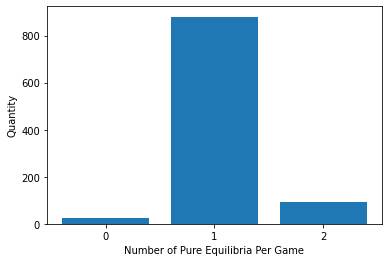

In [69]:
plt.bar(["0", "1", "2"], [26, 880, 94])

plt.xlabel("Number of Pure Equilibria Per Game")
plt.ylabel("Quantity")
plt.show()

In [31]:
new

[p1_p2_dist    0.021901
 p1_p3_dist    0.443700
 p2_p3_dist    0.436485
 p1_acc        0.832775
 p2_acc        0.671416
 p3_acc        0.531879
 p1_target     3.000000
 p2_target     1.000000
 p3_target     2.000000
 p1_survive    0.032000
 p2_survive    0.401000
 p3_survive    0.110000
 Name: 4213, dtype: float64,
 p1_p2_dist    0.039336
 p1_p3_dist    0.799133
 p2_p3_dist    0.760904
 p1_acc        0.491423
 p2_acc        0.280181
 p3_acc        0.134676
 p1_target     2.000000
 p2_target     1.000000
 p3_target     1.000000
 p1_survive    0.409000
 p2_survive    0.151000
 p3_survive    0.842000
 Name: 6960, dtype: float64,
 p1_p2_dist    0.046637
 p1_p3_dist    0.234732
 p2_p3_dist    0.191840
 p1_acc        0.052353
 p2_acc        0.024346
 p3_acc        0.013678
 p1_target     2.000000
 p2_target     1.000000
 p3_target     2.000000
 p1_survive    0.716000
 p2_survive    0.251000
 p3_survive    0.940000
 Name: 5809, dtype: float64,
 p1_p2_dist    0.050039
 p1_p3_dist    0.063812
 

In [32]:
len(new)

978

In [15]:
final = pd.concat(new, axis=1).T

In [129]:
final[final["p1_p2_dist"] < final["p1_p3_dist"]]

,p1_p2_dist,p1_p3_dist,p2_p3_dist,p1_acc,p2_acc,p3_acc,p1_target,p2_target,p3_target,p1_survive,p2_survive,p3_survive
2908,0.442348,0.550732,0.109143,0.676996,0.670505,0.604477,3.0,1.0,1.0,0.175,0.898,0.439
2909,0.442348,0.550732,0.109143,0.676996,0.670505,0.604477,3.0,1.0,2.0,0.372,0.774,0.335
1234,0.462037,0.564889,0.109621,0.983241,0.937285,0.708011,2.0,3.0,1.0,0.295,0.302,0.645
1236,0.462037,0.564889,0.109621,0.983241,0.937285,0.708011,3.0,1.0,1.0,0.121,0.854,0.294
1237,0.462037,0.564889,0.109621,0.983241,0.937285,0.708011,3.0,1.0,2.0,0.271,0.681,0.236
2861,0.630729,0.778371,0.292995,0.993930,0.959640,0.762987,3.0,1.0,2.0,0.183,0.593,0.132
3082,0.642766,0.796545,0.200479,0.975781,0.925335,0.756497,2.0,3.0,1.0,0.158,0.224,0.585
3084,0.642766,0.796545,0.200479,0.975781,0.925335,0.756497,3.0,1.0,1.0,0.066,0.883,0.159
3085,0.642766,0.796545,0.200479,0.975781,0.925335,0.756497,3.0,1.0,2.0,0.157,0.617,0.140
2876,0.687442,0.723934,0.235206,0.449362,0.380248,0.335203,3.0,1.0,1.0,0.223,0.858,0.435


In [9]:
p1 = equilibria["p1_survive"].idxmax()
p1 = p1.rename("best_row")
p2 = equilibria["p2_survive"].idxmax()
p2 = p2.rename("best_row")
p3 = equilibria["p3_survive"].idxmax()
p3 = p3.rename("best_row")

In [10]:
print(p1)

p1_p2_dist  p1_p3_dist  p2_p3_dist  p1_acc    p2_acc    p3_acc  
0.018937    0.162379    0.143462    0.519741  0.353610  0.121470      43
0.022998    0.351561    0.342962    0.787060  0.741075  0.305841    1499
0.027225    0.246177    0.225832    0.996931  0.790407  0.557758    2475
0.028107    0.330523    0.332541    0.905358  0.905182  0.508952    1811
0.031700    0.388124    0.419172    0.728720  0.650869  0.297581    2099
                                                                    ... 
0.558763    0.423564    0.248868    0.817281  0.718262  0.219615    3723
0.568841    0.283616    0.417785    0.794518  0.489508  0.042661     563
0.582339    0.418234    0.441327    0.907019  0.793020  0.034184    3699
0.585237    0.405004    0.180770    0.917245  0.647201  0.320773     683
0.602957    0.059180    0.555220    0.361921  0.358141  0.020937    2003
Name: best_row, Length: 500, dtype: int64


In [11]:
print(p2)

p1_p2_dist  p1_p3_dist  p2_p3_dist  p1_acc    p2_acc    p3_acc  
0.018937    0.162379    0.143462    0.519741  0.353610  0.121470      44
0.022998    0.351561    0.342962    0.787060  0.741075  0.305841    1500
0.027225    0.246177    0.225832    0.996931  0.790407  0.557758    2476
0.028107    0.330523    0.332541    0.905358  0.905182  0.508952    1812
0.031700    0.388124    0.419172    0.728720  0.650869  0.297581    2100
                                                                    ... 
0.558763    0.423564    0.248868    0.817281  0.718262  0.219615    3724
0.568841    0.283616    0.417785    0.794518  0.489508  0.042661     564
0.582339    0.418234    0.441327    0.907019  0.793020  0.034184    3700
0.585237    0.405004    0.180770    0.917245  0.647201  0.320773     684
0.602957    0.059180    0.555220    0.361921  0.358141  0.020937    2004
Name: best_row, Length: 500, dtype: int64


In [12]:
pd.merge(p1, p2, how='inner', on='best_row')

,best_row
